In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
     # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu,True)
        logical_gpus=tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus),"Physical GPUs,",len(logical_gpus),"Logical GPUs")
    except RuntimeError as e:
        #Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
# Fix error
# [ValueError: Object arrays cannot be loaded when allow_pickle=True]
# When loading data
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
# Training start
X_train, X_test, y_train, y_test = np.load('./Black_ice_Detection.npy')

In [4]:
# Check dataset shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14400, 150, 150, 3) (14400, 4)
(3600, 150, 150, 3) (3600, 4)


In [5]:
categories = ['blackice', 'dry', 'wet', 'snow']
nb_classes = len(categories)

In [6]:
# Create training model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(150, 150, 3),
                          kernel_size=(3,3), filters=32,
                          padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64,
                          padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128,
                          padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.25),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(units=nb_classes, activation='softmax')
])

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [9]:
# generalization
#X_train = X_train / 255.0
#X_test = X_test / 255.0

In [9]:
# Training start
history = model.fit(X_train, y_train, epochs=20, validation_split=0.25)

Epoch 1/20
338/338 [==============================] - 8s 24ms/step - loss: 0.7932 - accuracy: 0.6387 - val_loss: 0.5292 - val_accuracy: 0.7753
Epoch 2/20
338/338 [==============================] - 8s 23ms/step - loss: 0.4613 - accuracy: 0.8031 - val_loss: 0.4671 - val_accuracy: 0.8106
Epoch 3/20
338/338 [==============================] - 8s 23ms/step - loss: 0.4100 - accuracy: 0.8156 - val_loss: 0.3332 - val_accuracy: 0.8806
Epoch 4/20
338/338 [==============================] - 8s 23ms/step - loss: 0.3773 - accuracy: 0.8426 - val_loss: 0.4273 - val_accuracy: 0.8261
Epoch 5/20
338/338 [==============================] - 8s 23ms/step - loss: 0.3318 - accuracy: 0.8610 - val_loss: 0.2732 - val_accuracy: 0.8961
Epoch 6/20
338/338 [==============================] - 8s 23ms/step - loss: 0.3031 - accuracy: 0.8791 - val_loss: 0.2647 - val_accuracy: 0.9133
Epoch 7/20
338/338 [==============================] - 8s 23ms/step - loss: 0.2895 - accuracy: 0.8859 - val_loss: 0.2859 - val_accuracy: 0.8961

In [10]:
# Evaluate
print("정확도 : %.4f"%(model.evaluate(X_test, y_test)[1]))

113/113 [==============================] - 1s 9ms/step - loss: 0.2093 - accuracy: 0.9358
정확도 : 0.9358


In [11]:
model.evaluate(X_test, y_test)

113/113 [==============================] - 1s 9ms/step - loss: 0.2093 - accuracy: 0.9358


[0.2092582881450653, 0.9358333349227905]

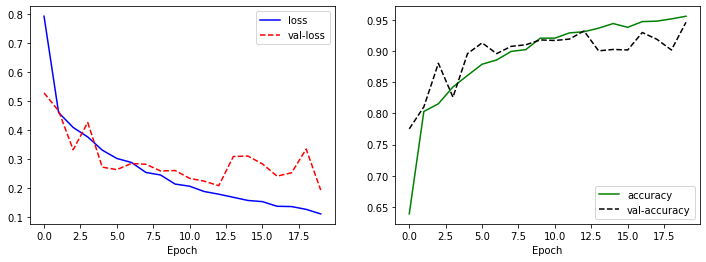

In [12]:
# Show loss, accuracy graph
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val-loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val-accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
# Evaluate model use other image
